<a href="https://colab.research.google.com/github/G-Kaviya2005/Kaviya_FF923E98783FA9A832D458024FFD0C36-smartinternz.com/blob/main/Copy_of_Wind_Energy_in_Germany.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
aymanlafaz_wind_energy_germany_path = kagglehub.dataset_download('aymanlafaz/wind-energy-germany')

print('Data source import complete.')


100%|██████████| 14.9k/14.9k [00:00<00:00, 2.13MB/s]

Extracting files...
Data source import complete.


# Introduction 😃😃😃

### Wind Energy in Germany
#### Temperature and wind energy production 2017-2019


#### Content
- This dataset is pretty simple, It's a time series dataset containing measurements of daily temperature, wind production and capacity from 2017 to 2019.


#### The columns in the dataset are :

- utc_timestamp : Time in UTC
- wind_generation : Daily wind production in MW
- wind_capacity : Electrical capacity of wind in MW
- temperature : Daily Temperature in degrees C


## Mission : 🤝🤝

-The goal of this dataset is to forecast wind power generation at a daily rate using different time series and traditional machine learning models.



## Work plan 🤝🤝🤝🤝🤝¶

- Analyze and explore data
- Building a Machine Learning Model



# 1- Analyze and Explore DataSet¶


In [ ]:
#Importing the basic librarires fot analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")  #using style ggplot

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import datetime as dt
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
#Importing the training dataset

df=pd.read_csv("/content/germany-wind-energy.csv")

# looking the data set
df.head()

,utc_timestamp,wind_generation_actual,wind_capacity,temperature
0,2017-01-01 00:00:00+00:00,291760.0,37149.130,-2.117
1,2017-01-02 00:00:00+00:00,295097.0,37152.125,-1.154
2,2017-01-03 00:00:00+00:00,666170.0,37155.208,-0.239
3,2017-01-04 00:00:00+00:00,686581.0,37160.125,0.620
4,2017-01-05 00:00:00+00:00,261759.0,37163.542,-3.908


In [ ]:
#print the shape dataset
print("Shape The DataSet ", df.shape )

Shape The DataSet  (1094, 4)


In [ ]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   utc_timestamp           1094 non-null   object 
 1   wind_generation_actual  1094 non-null   float64
 2   wind_capacity           1094 non-null   float64
 3   temperature             1094 non-null   float64
dtypes: float64(3), object(1)
memory usage: 34.3+ KB


In [ ]:
# change the column from object to DataTime

df["utc_timestamp"]=pd.to_datetime(df["utc_timestamp"])

In [ ]:
#checking null value
df.isna().sum()

,0
utc_timestamp,0
wind_generation_actual,0
wind_capacity,0
temperature,0


- No any missing value

In [ ]:
# Describe value data set
df.describe().round(2)

,wind_generation_actual,wind_capacity,temperature
count,1094.00,1094.00,1094.00
mean,305819.77,45066.02,10.05
std,205728.86,4315.84,7.74
min,16482.00,37149.13,-9.36
25%,148552.75,41447.94,3.58
50%,254332.50,46073.00,10.05
75%,412570.50,49203.00,16.57
max,998899.00,50452.00,28.24


# Some Visualizations Analysis

Text(0.5, 1.0, 'The change wind by the years')

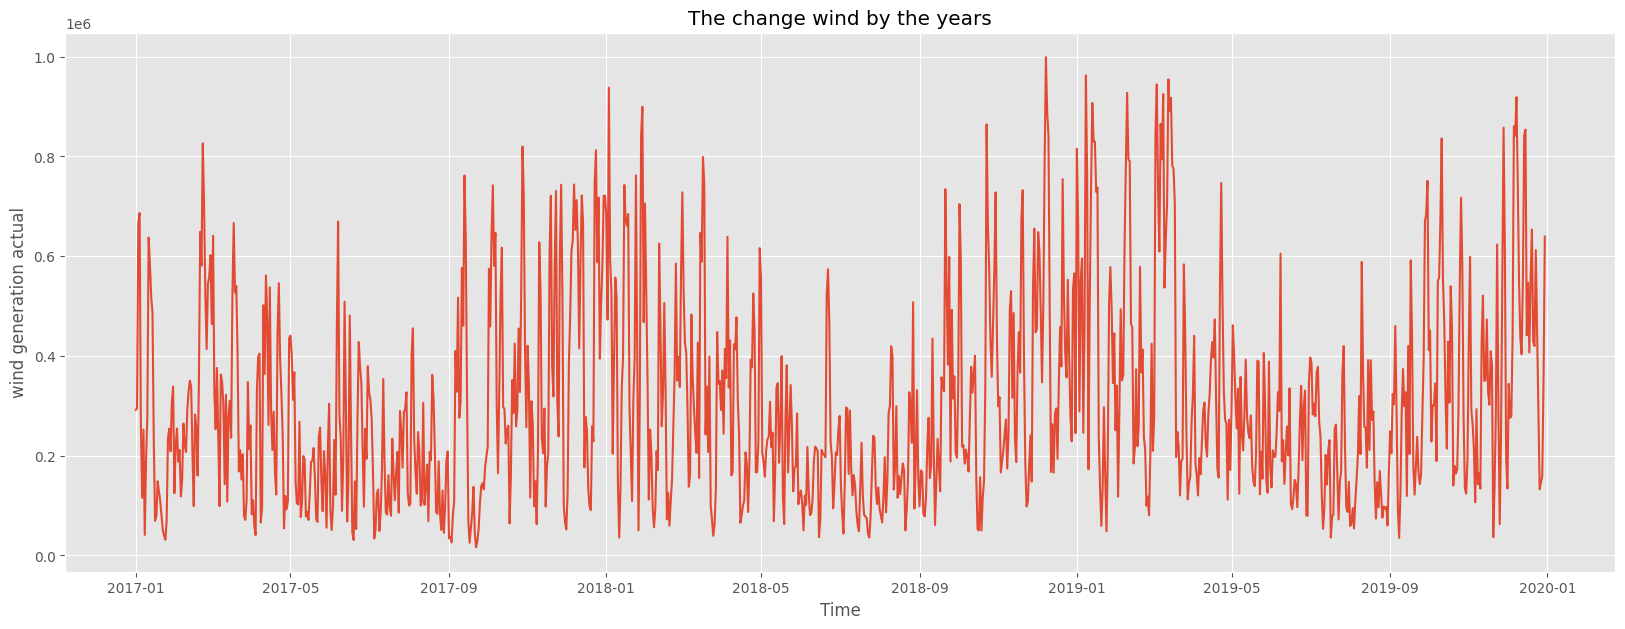

In [ ]:
# show the change wind by the years
plt.figure(figsize=(20,7))

sns.lineplot(data=df, x="utc_timestamp",y="wind_generation_actual")
plt.xlabel("Time")
plt.ylabel("wind generation actual")
plt.title("The change wind by the years")

- We see at the summer season the less wind also the highest at winter season

Text(0.5, 1.0, 'The wind capacity by the years')

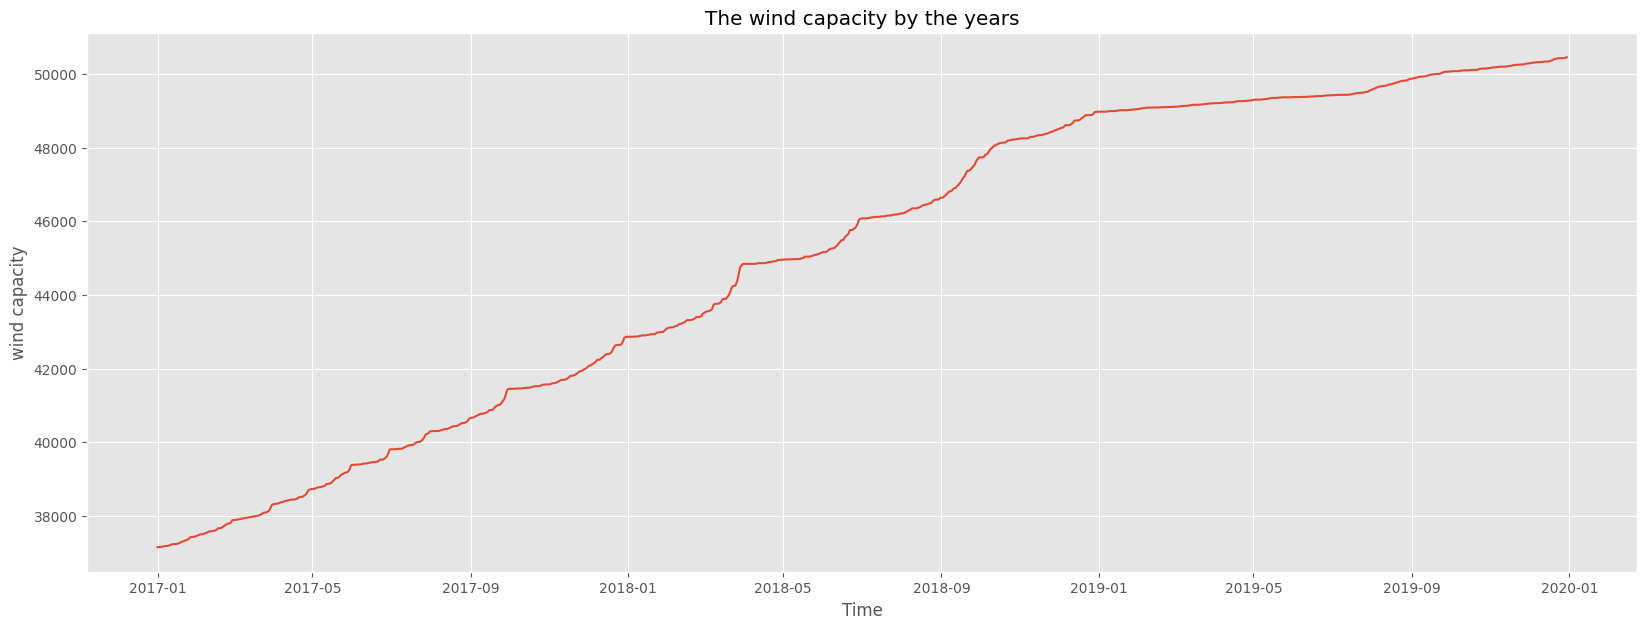

In [ ]:
# show the wind capacity by the years
plt.figure(figsize=(20,7))

sns.lineplot(data=df, x="utc_timestamp",y="wind_capacity")
plt.xlabel("Time")
plt.ylabel("wind capacity")
plt.title("The wind capacity by the years")

- - We see the wind capacity increasing by the years

Text(0.5, 1.0, 'The temperature by the years')

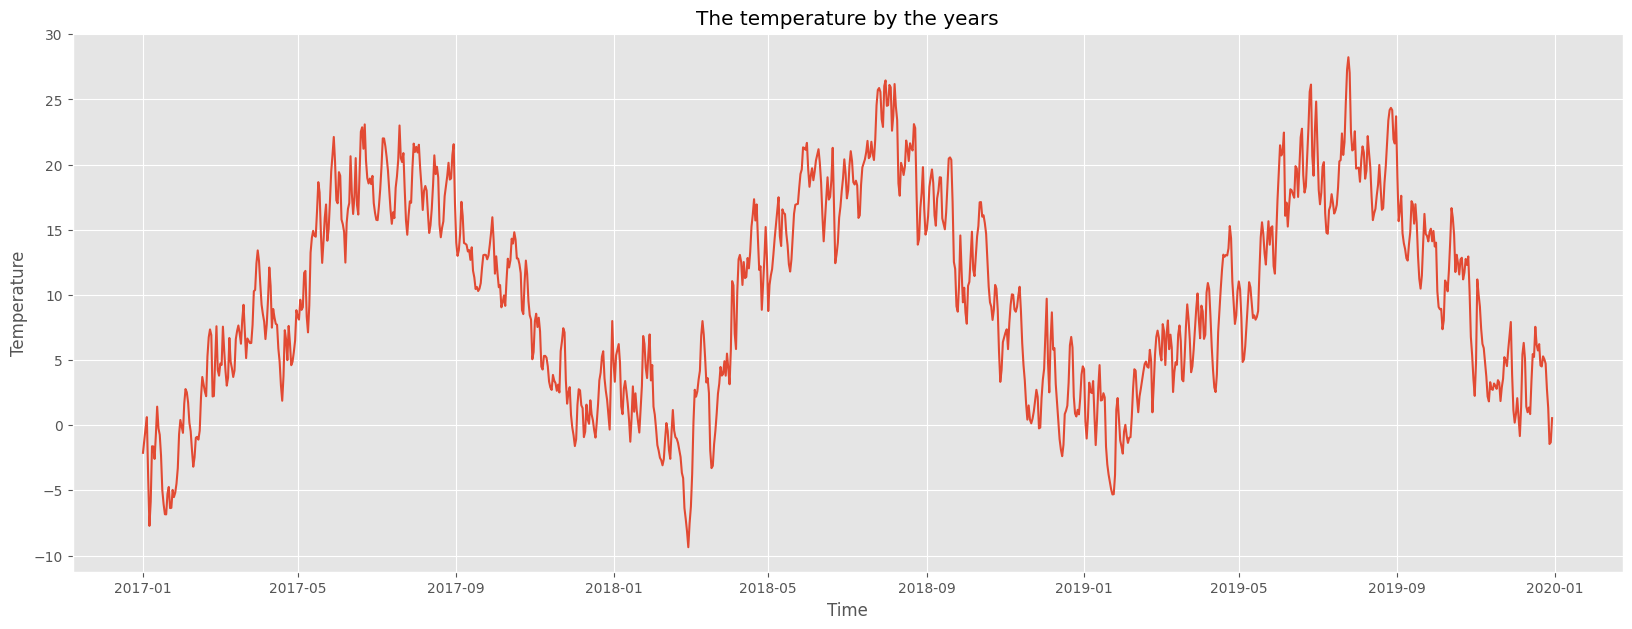

In [ ]:
# show the temperature by the years
plt.figure(figsize=(20,7))

sns.lineplot(data=df, x="utc_timestamp",y="temperature")
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.title("The temperature by the years")

- - The highest temperature at summer season the average around 25 , the less temperature and winter season also the temperature less 0

In [ ]:
# using interactive graph - plotly
px.scatter_3d(df, x="utc_timestamp",y="wind_capacity",z="temperature")


# Analysis Results 😃😃😃😃

### Wind Energy in Germany
#### Temperature and wind energy production 2017-2019

#### This dataset is pretty simple, It's a time series dataset containing measurements of daily temperature, wind production and capacity from 2017 to 2019.


- Shape The DataSet  (1094, 4)

- No any missing value

- The summer season the less wind also the highest at winter season

- The wind capacity increasing by the years

- The highest temperature at summer season the average around 25 , the less temperature and winter season also the temperature less 0 .

# 2 -Building a Machine Learning Model - Regression 🙄🙄🙄

In [ ]:
#Importing the basic librarires for building model


from sklearn.linear_model import LinearRegression  ,BayesianRidge,HuberRegressor,ARDRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score,r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectPercentile
from sklearn.preprocessing import StandardScaler ,PolynomialFeatures,minmax_scale,MaxAbsScaler ,LabelEncoder
from sklearn.neural_network import MLPRegressor

from sklearn.svm import SVR
from xgboost import XGBRegressor

In [ ]:
#show the data set
df.head()

In [ ]:
# I want add columns year and month

df["Year"]=df["utc_timestamp"].dt.year
df["Month"]=df["utc_timestamp"].dt.month
df["Day"]=df["utc_timestamp"].dt.day

df.drop(columns="utc_timestamp",axis=1,inplace=True)

In [ ]:
df.head()

In [ ]:
#Defined X value and y value , and split the data train

X = df.drop(columns="wind_generation_actual")
y = df["wind_generation_actual"]    # y = quality

# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (820, 5)
X Test  :  (274, 5)
Y Train :  (820,)
Y Test  :  (274,)


## Linear Model 🎉🎉🎉

In [ ]:
# using the model Linear Regression

LinearRegression_model=LinearRegression(fit_intercept=True,n_jobs=None)

# fit model

LinearRegression_model.fit(X_train,y_train)

# Score X and Y - test and train

print("Score the X-train with Y-train is : ", LinearRegression_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", LinearRegression_model.score(X_test,y_test))

# Expected value Y using X test
y_pred_LR=LinearRegression_model.predict(X_test)

# Model Evaluation
print( " Model Evaluation Linear R : mean absolute error is ", mean_absolute_error(y_test,y_pred_LR))
print(" Model Evaluation Linear R : mean squared  error is " , mean_squared_error(y_test,y_pred_LR))
print(" Model Evaluation Linear R : median absolute error is " ,median_absolute_error(y_test,y_pred_LR))

print(" The Score Linear Regression " ,r2_score(y_test,y_pred_LR))

Score the X-train with Y-train is :  0.15392171148038458
Score the X-test  with Y-test  is :  0.08407558574041574
 Model Evaluation Linear R : mean absolute error is  156349.19502784958
 Model Evaluation Linear R : mean squared  error is  38115938349.263626
 Model Evaluation Linear R : median absolute error is  119496.45369144529
 The Score Linear Regression  0.08407558574041574


- Inference : 8 % not working 😷😷😷

## ARD Regression

In [ ]:
# using the model ARD Regression

ARDRegression_model=ARDRegression(
    tol=1e-4,
    alpha_1=1e-06,
    alpha_2=1e-06,
    lambda_1=1e-06,
    lambda_2=1e-06,
    compute_score=False,
    threshold_lambda=10000.0,
    fit_intercept=True,
    copy_X=True,
    verbose=False)


# fit model

ARDRegression_model.fit(X_train,y_train)

# Score X and Y - test and train

print("Score the X-train with Y-train is : ", ARDRegression_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", ARDRegression_model.score(X_test,y_test))

# Expected value Y using X test
y_predARD=ARDRegression_model.predict(X_test)

# Model Evaluation
print( " Model Evaluation Linear R : mean absolute error is ", mean_absolute_error(y_test,y_predARD))
print(" Model Evaluation Linear R : mean squared  error is " , mean_squared_error(y_test,y_predARD))
print(" Model Evaluation Linear R : median absolute error is " ,median_absolute_error(y_test,y_predARD))

print(" The Score ARD Regression " ,r2_score(y_test,y_predARD))


Score the X-train with Y-train is :  0.1518364860341891
Score the X-test  with Y-test  is :  0.08307536010604943
 Model Evaluation Linear R : mean absolute error is  156032.86869392343
 Model Evaluation Linear R : mean squared  error is  38157562459.3117
 Model Evaluation Linear R : median absolute error is  121373.3427714082
 The Score ARD Regression  0.08307536010604943


- Inference : 10 % not working 😷😷😷

## Decision Tree Regressor

In [ ]:
# using the Decision Tree Regressor Model

DecisionTreeRegressor_model=DecisionTreeRegressor(criterion='squared_error',
    splitter='best',
    max_depth=100)

# fit model

DecisionTreeRegressor_model.fit(X_train,y_train)

# Score X and Y - test and train

print("Score the X-train with Y-train is : ", DecisionTreeRegressor_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", DecisionTreeRegressor_model.score(X_test,y_test))

# Expected value Y using X test
y_predDTR=DecisionTreeRegressor_model.predict(X_test)

# Model Evaluation

print(" The Score Decision Tree Regressor model " ,r2_score(y_test,y_predDTR))


Score the X-train with Y-train is :  1.0
Score the X-test  with Y-test  is :  0.0745114826935811
 The Score Decision Tree Regressor model  0.0745114826935811


- Inference : 0 % not working 😷😷😷

## K Neighbors Regressor

In [ ]:
# using the K Neighbors Regressor Model

KNeighborsRegressor_model=KNeighborsRegressor(n_neighbors=6,weights='uniform',algorithm='auto',leaf_size=20,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None)

# fit model

KNeighborsRegressor_model.fit(X_train,y_train)

# Score X and Y - test and train

print("Score the X-train with Y-train is : ", DecisionTreeRegressor_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", DecisionTreeRegressor_model.score(X_test,y_test))

# Expected value Y using X test
y_predKN=KNeighborsRegressor_model.predict(X_test)

# Model Evaluation

print(" The Score K Neighbors Regressor Model " ,r2_score(y_test,y_predKN))

Score the X-train with Y-train is :  1.0
Score the X-test  with Y-test  is :  0.0745114826935811
 The Score K Neighbors Regressor Model  0.252622044633239


- Inference : 25 % not working 😷😷😷

## Random Forest Regressor

In [ ]:
# using the Random Forest Regressor Model

RandomForestRegressor_model=RandomForestRegressor(n_estimators=100,ccp_alpha=20,criterion="absolute_error")

# fit model

RandomForestRegressor_model.fit(X_train,y_train)

# Score X and Y - test and train

print("Score the X-train with Y-train is : ", RandomForestRegressor_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", RandomForestRegressor_model.score(X_test,y_test))

# Expected value Y using X test
y_predRFR=RandomForestRegressor_model.predict(X_test)

# Model Evaluation

print(" The Score Random Forest Regressor Model " ,r2_score(y_test,y_predRFR))


Score the X-train with Y-train is :  0.918732515298517
Score the X-test  with Y-test  is :  0.39647750822489336
 The Score Random Forest Regressor Model  0.39647750822489336


- Inference : 38 % not working 😷😷😷

## MLP Regressor

In [ ]:
# using the MLP Regressor Model

MLPRegressor_model=MLPRegressor()

# fit model

MLPRegressor_model.fit(X_train,y_train)

# Score X and Y - test and train

print("Score the X-train with Y-train is : ", MLPRegressor_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", MLPRegressor_model.score(X_test,y_test))

# Expected value Y using X test
y_predMLP=MLPRegressor_model.predict(X_test)

# Model Evaluation

print(" The Score MLP Regressor Model " ,r2_score(y_test,y_predMLP))

Score the X-train with Y-train is :  0.02542204438944551
Score the X-test  with Y-test  is :  -0.016300405323068423
 The Score MLP Regressor Model  -0.016300405323068423


## Regressor Model

In [ ]:
# using the SVR-  Regressor Model

svr_model=SVR(degree=1)

# fit model

svr_model.fit(X_train,y_train)

# Score X and Y - test and train

print("Score the X-train with Y-train is : ", svr_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", svr_model.score(X_test,y_test))

# Expected value Y using X test
y_predsvr=svr_model.predict(X_test)

# Model Evaluation

print(" The Score SVR  Model " ,r2_score(y_test,y_predsvr))

Score the X-train with Y-train is :  -0.06194519439619506
Score the X-test  with Y-test  is :  -0.10172986369636994
 The Score SVR  Model  -0.10172986369636994


# Notes

- Thank for reading my analysis and my regression.
- If you any questions or advice me please write in the comment .
- If anyone has a model with a higher percentage, please tell me
- I will do an update my notebook - soon , I know this model not working 38%

- The Score Random Forest Regressor Model  0.38



# Upvote
- If you liked my work upvote me ,


# The End